In [9]:
from src.data_gen import data_gen, data_gen_xu
from src.gsc_ipca import gsc_ipca
from src.gsc_ife import gsc_ife
from src.scm import scm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
color

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [17]:
df = pd.read_csv('data/prop99_python.csv')   
df['d'] = df.treated*df.post
df['const'] = 1

In [18]:
scm_model = scm(df=df, id='state', year='year', outcome='packspercapita', treated='d', v=None)
scm_model.fit()

<Axes: >

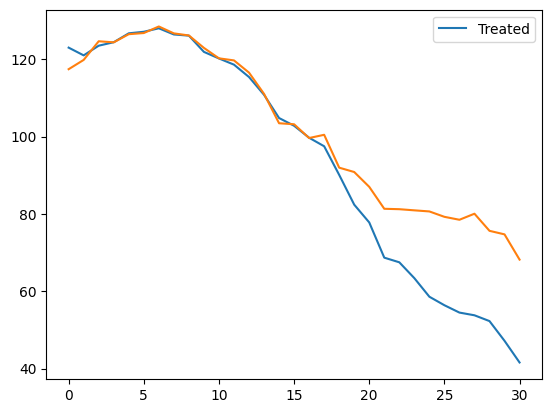

In [19]:
sns.lineplot(df[df.treated==1].packspercapita.values, label='Treated')
sns.lineplot(scm_model.Y_syn)

In [22]:
# Fit the model
covariates = ['const']
gsc_ipca_model = gsc_ipca(df=df, id='state', year='year', outcome='packspercapita', covariates=covariates, treated='d', K=1, L=1)
gsc_ipca_model.fit(verbose=False)

<Axes: >

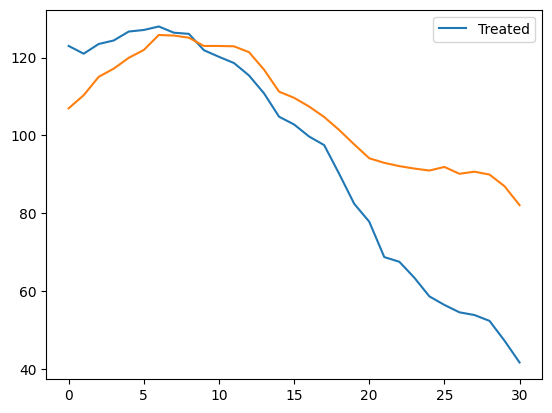

In [23]:
sns.lineplot(df[df.treated==1].packspercapita.values, label='Treated')
sns.lineplot(gsc_ipca_model.Y_syn.flatten())